In [0]:
def Kmeans_model(X_train,X_test,y_train,y_test):
  print("entered the kmeans without autoencoder function")
  #setting the number of cluster as 10
  km=KMeans(n_clusters=10,max_iter=300)
  #training the model
  y_pred_kmeans=km.fit_predict(X_train)
  #predict the test data
  pred1=km.predict(X_test)
  #predict the training data
  pred2=km.predict(X_train)
  #Checking the normalized mutual information score
  z1=normalized_mutual_info_score(y_train,pred2)
  print("Accuracy of Kmeans for the train set: ",z1)
  y1=normalized_mutual_info_score(y_test,pred1)
  print("Accuracy of Kmeans for the validation set: ",y1)
  print("Confusion matrix for Kmeans: ")
  x1=metrics.confusion_matrix(y_test, pred1)
  print("\n",x1)

In [0]:
def kmeans_auto_model(X_train,X_test,y_train,y_test):
  print("Entered the kmeans_autoencoder function")

  #initializing the layers of the autoencoder
  input_data=Input(shape=(784,))
  layer1=Dense(512,activation='relu')(input_data)
  layer2=Dense(128,activation='relu')(layer1)
  encoded_layer=Dense(64,activation='relu')(layer2)
  layer4=Dense(128,activation='relu')(encoded_layer)
  layer5=Dense(512,activation='relu')(layer4)
  output_layer=Dense(784,activation='sigmoid')(layer5)

  #training the model
  autoencoder=Model(input_data,output_layer)
  encoder=Model(input_data,encoded_layer)
  autoencoder.summary()
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
  history=autoencoder.fit(X_train, X_train,epochs=100)

  plt.plot(history.history['acc'])
  plt.title('Accuracy of the model')
  plt.ylabel('Accuracy')
  plt.xlabel('Number of epochs')
  plt.show()

  plt.plot(history.history['loss'])
  plt.title('Loss of the model')
  plt.ylabel('Loss')
  plt.xlabel('Number of epochs')
  plt.show()

  plot_model(autoencoder,show_shapes=True,to_file='autoencoder.png')

  #Setting the cluster size of the K-Means as 10
  kmeans=KMeans(n_clusters=10)
  y_pred=encoder.predict(X_test)
  y_pred2=encoder.predict(X_train)
  y_pred1=kmeans.fit_predict(y_pred)
  y_pred3=kmeans.fit_predict(y_pred2)

  #Getting the normalized scores
  z1=normalized_mutual_info_score(y_train,y_pred3)
  print("Accuracy of Kmeans with autoencoder for the train set: ",z1)
  y1=normalized_mutual_info_score(y_test,y_pred1)
  print("Accuracy of Kmeans with autoencoder for the test set: ",y1)
  print("Confusion matrix for Kmeans: ")
  x1=metrics.confusion_matrix(y_test, y_pred1)
  print("\n",x1)

In [0]:
def GMM(X_train,X_test,y_train,y_test):
  print("Entered the GMM function")

  #initializing the autoencoder for the Gaussian Mixture Model
  input_data=Input(shape=(784,))
  layer1=Dense(512,activation='relu')(input_data)
  layer2=Dense(250,activation='relu')(layer1)
  encoded_layer=Dense(128,activation='relu')(layer2)
  layer4=Dense(250,activation='relu')(encoded_layer)
  layer5=Dense(512,activation='relu')(layer4)
  output_layer=Dense(784,activation='sigmoid')(layer5)

  #Training the data
  autoencoder=Model(input_data,output_layer)
  encoder=Model(input_data,encoded_layer)
  autoencoder.summary()
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
  history=autoencoder.fit(X_train, X_train,epochs=100,validation_split=0.2)

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Accuracy of the model')
  plt.ylabel('Accuracy')
  plt.xlabel('Number of epochs')
  plt.legend(['Training data', 'Validation data'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of the model')
  plt.ylabel('Loss')
  plt.xlabel('Number of epochs')
  plt.legend(['Training data', 'Validation data'], loc='upper left')
  plt.show()

  plt.plot(history.history['acc'])
  plt.title('Accuracy of the model')
  plt.ylabel('Accuracy')
  plt.xlabel('Number of epochs')
  plt.show()

  plt.plot(history.history['loss'])
  plt.title('Loss of the model')
  plt.ylabel('Loss')
  plt.xlabel('Number of epochs')
  plt.show()

  plot_model(autoencoder,show_shapes=True,to_file='autoencoder.png')

  
  gmm = GaussianMixture(n_components=10)
  y_pred=encoder.predict(X_test)
  y_pred2=encoder.predict(X_train)
  y_pred1=gmm.fit_predict(y_pred)
  y_pred3=gmm.fit_predict(y_pred2)

  #Calculating the accuracy
  z1=normalized_mutual_info_score(y_train,y_pred3)
  print("Accuracy of GMM for the train set: ",z1)
  y1=normalized_mutual_info_score(y_test,y_pred1)
  print("Accuracy of GMM for the test set: ",y1)
  print("Confusion matrix for GMM: ")
  x1=metrics.confusion_matrix(y_test, y_pred1)
  print("\n",x1)

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
entered the kmeans without autoencoder function
Accuracy of Kmeans for the train set:  0.5120294085541401
Accuracy of Kmeans for the validation set:  0.514145389900235
Confusion matrix for Kmeans: 

 [[  1 588  66  24   5   0   7   5 268  36]
 [  0  49  19 889   0   0  11   0  30   2]
 [  0  14  48   4   2   0 289   4 326 313]
 [  0 281  74 490   2   0  12   3 135   3]
 [  0 102  36  25   2   0 510   5 132 188]
 [220   0 690   0   3  79   0   0   8   0]
 [  0 185  97  11  13   0 194   0 356 144]
 [865   0  84   0   1  50   0   0   0   0]
 [ 48   3  69   4 348   0   7 404  56  61]
 [107   0  36   0   2 844   1   2   7   1]]
Entered the kmeans_autoencoder function



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
________________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)





Epoch 1/100





60000/60000 [==============================] - 12s 205us/step - loss: 0.3036 - acc: 0.5047
Epoch 2/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.2793 - acc: 0.5082
Epoch 3/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.2745 - acc: 0.5086
Epoch 4/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.2719 - acc: 0.5088
Epoch 5/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.2703 - acc: 0.5089
Epoch 6/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.2691 - acc: 0.5090
Epoch 7/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.2681 - acc: 0.5091
Epoch 8/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.2673 - acc: 0.5091
Epoch 9/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.2667 - acc: 0.5092
Epoch 10/100
60000/60000 [==============================] - 8s 131us/step

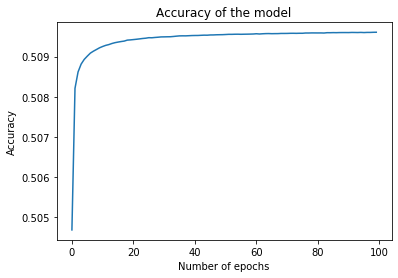

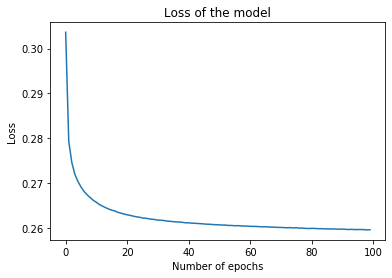

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Accuracy of Kmeans with autoencoder for the train set:  0.5577406635141282
Accuracy of Kmeans with autoencoder for the test set:  0.5555642257549414
Confusion matrix for Kmeans: 

 [[  0   1 108   3   1 307   2  12   7 559]
 [843   0  88   0   0  51   0  15   0   3]
 [  0   0  11   2   0 350   1 517   3 116]
 [  8   0 796   0   1 154   1  27   0  13]
 [  0   0 110   2   0 180   1 681   2  24]
 [  0 140   0 134 302  15 409   0   0   0]
 [  0   1  86   6   0 441   3 276   7 180]
 [  0 760   0 221   3   0  16   0   0   0]
 [  0  12  22 353   5  56   5   8 471  68]
 [  0  21   1 549 421   7   0   0   1   0]]
Entered the GMM function
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
________________

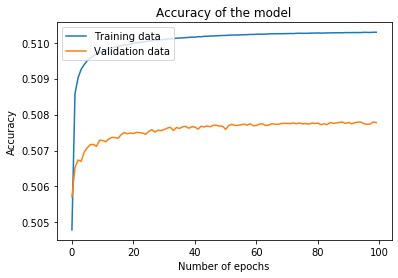

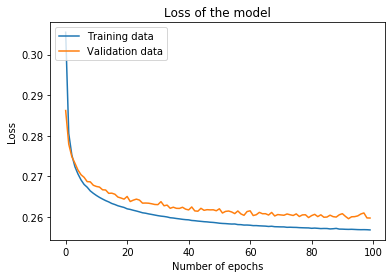

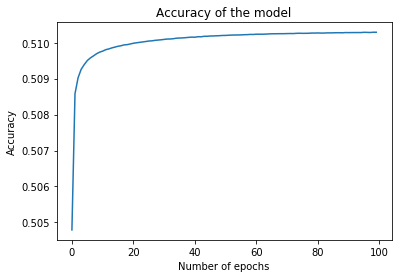

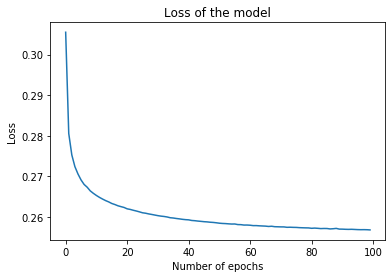

Accuracy of GMM for the train set:  0.5702509242390752
Accuracy of GMM for the test set:  0.5675213374757517
Confusion matrix for GMM: 

 [[193   0   1   3  20 371   3 406   0   3]
 [ 67   0 891   0   0  42   0   0   0   0]
 [ 11   0   0   0 681 259   0  49   0   0]
 [757   0 101   0  23  93   3  16   0   7]
 [116   0   0   0 713 148   0  20   0   3]
 [  0 354   0 312   0   1 329   0   4   0]
 [104   0   0   2 460 258   0 174   0   2]
 [  0 658   0 291   0   0   3   0  48   0]
 [  2   4   1 116   2 391   1   1   8 474]
 [  0   2   0  84   0   2 336   0 576   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from keras.layers import Input, Dense
from keras.models import Model
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import normalized_mutual_info_score
import keras
from keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score

mnist=tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train/255.0
X_test=X_test/255.0

X_train=np.reshape(X_train,(60000,784))
X_test=np.reshape(X_test,(10000,784))

Kmeans_model(X_train,X_test,y_train,y_test)
kmeans_auto_model(X_train,X_test,y_train,y_test)
GMM(X_train,X_test,y_train,y_test)